In [154]:
import os
from dotenv import load_dotenv
import numpy as np
import pandas as pd
import sqlalchemy as sa
from sqlalchemy.engine.url import URL

load_dotenv('.env')

url = URL.create(
    drivername="mysql",
    username=os.getenv('USER'),
    password=os.getenv('PIN'),
    host=os.getenv('HOST'),
    port=int(os.getenv('PORT')),
    database=os.getenv('DB'),
    query={"charset": "utf8"}
)

# engine作成
engine = sa.create_engine(url, echo=False)

# pandasのread_sql関数にselect文とengineを指定する
query = "select p.`condition`, c.`row`, c.`column`, c.pieceName, c.pieceID from jdbctestdb.Node as c join jdbctestdb.Node as p on c.parentID = p.ID where p.`condition` is not null limit 100000;"
df = pd.read_sql(query, con=engine)

print(df)

query = "select p.`condition`, c.`row`, c.`column`, c.pieceName, c.pieceID from jdbctestdb.Node as c join jdbctestdb.Node as p on c.parentID = p.ID where p.`condition` is not null order by p.turnNumber limit 100000;"
test = pd.read_sql(query, con=engine)

                                               condition  row  column  \
0      b'\x00\x04\x00\x80\x122\x00@\x08\x01u\x80\x04\...    1       7   
1      b'\x01\x99\xc6\x00\x12\x18\x00@\x08\x01m@\x04\...    6       1   
2      b"\x0f9\xc64\xa0\x02\x00@\x08\x01u\x8f\xb8\x00...    4       4   
3      b"\x00\x04\x00\xac@\x02\x00@\x08\x01\x00 \x04\...    7       3   
4      b'\x00\x05\xc6\x00\x10\x02\xa8\x80\x08\x01\'/\...    3       7   
...                                                  ...  ...     ...   
99995  b"\x00\x04\x8c\xc1\xd0\x02\x00c\x81,s%\xed\xe7...    3       6   
99996  b'\x00\x04\x00\x80\x10\x02\xa8\x80\x08\x01u\x8...    4       8   
99997  b"\r)\xb5\x90\xc0\x88\x00@\x0c0''t\x00\x80\x10...    1       3   
99998  b'\x00\x05Q.b2\x00@\x0bj\x00 \x043\x00\x10\x02...    8       6   
99999  b"\x0f9\xc64\xa6\x10\xca\x00\x0bju\x8f\xb8\x00...    8       3   

       pieceName  pieceID  
0              7       17  
1              7       12  
2              3       24  
3          

In [138]:
rows = {1: 'row1', 2: 'row2', 3: 'row3', 4: 'row4', 5: 'row5', 6: 'row6', 7: 'row7', 8: 'row8', 9: 'row9'}
columns = {1: 'cone', 2: 'column2', 3: 'column3', 4: 'column4', 5: 'column5', 6: 'column6', 7: 'column7', 8: 'column8', 9: 'column9'}
pieceNames = {0: 'king', 1: 'rook', 2: 'bichop', 3: 'goldgengral', 4: 'silvergeneral', 5: 'knight', 6: 'lance', 7: 'pawn', 8: 'promoted_rook', 9: 'promoted_bichop', 10: 'promoted_silvergeneral', 11: 'promoted_knight', 12: 'promoted_lance', 13: 'promoted_pawn'}
pieceIds = {}
for i in range(1, 41):
    pieceIds[i] = f"pid{i}"

In [144]:
binarray = []
for i in test['condition']:
    bin = []
    for j in i:
        str = f"{j:0=8b}"
        for k in str:
            bin.append(float(k))
    del bin[0:3]
    binarray.append(bin)

ts_input = pd.DataFrame(binarray)
ts_output_row = test[['row']]
ts_output_column = test[['column']]
ts_output_pieceName = test[['pieceName']]
ts_output_pieceId = test[['pieceID']]

ts_output_row['row'] = ts_output_row['row'].map(rows)
ts_output_row = pd.get_dummies(ts_output_row, columns=['row'], prefix='', prefix_sep='')
ts_output_column['column'] = ts_output_column['column'].map(columns)
ts_output_column = pd.get_dummies(ts_output_column, columns=['column'], prefix='', prefix_sep='')
ts_output_pieceName['pieceName'] = ts_output_pieceName['pieceName'].map(pieceNames)
ts_output_pieceName = pd.get_dummies(ts_output_pieceName, columns=['pieceName'], prefix='', prefix_sep='')
ts_output_pieceId['pieceID'] = ts_output_pieceId['pieceID'].map(pieceIds)
ts_output_pieceId = pd.get_dummies(ts_output_pieceId, columns=['pieceID'], prefix='', prefix_sep='')

C:\Users\s-sasahira\AppData\Local\Temp\ipykernel_17328\104520139.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_output_row['row'] = ts_output_row['row'].map(rows)
C:\Users\s-sasahira\AppData\Local\Temp\ipykernel_17328\104520139.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_output_column['column'] = ts_output_column['column'].map(columns)
C:\Users\s-sasahira\AppData\Local\Temp\ipykernel_17328\104520139.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [155]:
binarray = []
for i in df['condition']:
    bin = []
    for j in i:
        str = f"{j:0=8b}"
        for k in str:
            bin.append(float(k))
    del bin[0:3]
    binarray.append(bin)

ds_input = pd.DataFrame(binarray)
ds_output_row = df[['row']]
ds_output_column = df[['column']]
ds_output_pieceName = df[['pieceName']]
ds_output_pieceId = df[['pieceID']]

ds_output_row['row'] = ds_output_row['row'].map(rows)
ds_output_row = pd.get_dummies(ds_output_row, columns=['row'], prefix='', prefix_sep='')
ds_output_column['column'] = ds_output_column['column'].map(columns)
ds_output_column = pd.get_dummies(ds_output_column, columns=['column'], prefix='', prefix_sep='')
ds_output_pieceName['pieceName'] = ds_output_pieceName['pieceName'].map(pieceNames)
ds_output_pieceName = pd.get_dummies(ds_output_pieceName, columns=['pieceName'], prefix='', prefix_sep='')
ds_output_pieceId['pieceID'] = ds_output_pieceId['pieceID'].map(pieceIds)
ds_output_pieceId = pd.get_dummies(ds_output_pieceId, columns=['pieceID'], prefix='', prefix_sep='')


C:\Users\s-sasahira\AppData\Local\Temp\ipykernel_17328\2790426197.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_output_row['row'] = ds_output_row['row'].map(rows)
C:\Users\s-sasahira\AppData\Local\Temp\ipykernel_17328\2790426197.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_output_column['column'] = ds_output_column['column'].map(columns)
C:\Users\s-sasahira\AppData\Local\Temp\ipykernel_17328\2790426197.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [156]:
print(ds_input.shape)
print(ds_output_row.shape)
print(ds_output_column.shape)
print(ds_output_pieceName.shape)
print(ds_output_pieceId.shape)

print(ts_input.shape)
print(ts_output_row.shape)
print(ts_output_column.shape)
print(ts_output_pieceName.shape)
print(ts_output_pieceId.shape)

print(ts_output_pieceName.loc[0])

(100000, 1341)
(100000, 9)
(100000, 9)
(100000, 14)
(100000, 40)
(100000, 1341)
(100000, 9)
(100000, 9)
(100000, 14)
(100000, 40)
bichop                    False
goldgengral               False
king                      False
knight                    False
lance                     False
pawn                       True
promoted_bichop           False
promoted_knight           False
promoted_lance            False
promoted_pawn             False
promoted_rook             False
promoted_silvergeneral    False
rook                      False
silvergeneral             False
Name: 0, dtype: bool


In [157]:
import tensorflow as tf

inputs = tf.keras.Input(shape=1341)
hide1 = tf.keras.layers.Dense(1341, activation="relu")(inputs)
hide2 = tf.keras.layers.Dense(1341, activation="relu")(hide1)
output_row = tf.keras.layers.Dense(9, activation="softmax", name="row")(hide2)
output_column = tf.keras.layers.Dense(9, activation="softmax", name="column")(hide2)
output_pieceName = tf.keras.layers.Dense(14, activation="softmax", name="pieceName")(hide2)
output_pieceId = tf.keras.layers.Dense(40, activation="softmax", name="pieceId")(hide2)
model = tf.keras.Model(inputs= inputs, outputs=[output_row, output_column, output_pieceName, output_pieceId])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 1341)]               0         []                            
                                                                                                  
 dense_4 (Dense)             (None, 1341)                 1799622   ['input_3[0][0]']             
                                                                                                  
 dense_5 (Dense)             (None, 1341)                 1799622   ['dense_4[0][0]']             
                                                                                                  
 row (Dense)                 (None, 9)                    12078     ['dense_5[0][0]']             
                                                                                            

In [158]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [159]:
new_model = tf.keras.models.load_model('saved_model/my_model')

history = model.fit(ds_input, [ds_output_row, ds_output_column, ds_output_pieceName, ds_output_pieceId], epochs=30)

model.save('saved_model/my_model')

Epoch 1/30
3125/3125 [==============================] - 243s 77ms/step - loss: 9.6613 - row_loss: 2.0080 - column_loss: 2.1836 - pieceName_loss: 2.1725 - pieceId_loss: 3.2972 - row_accuracy: 0.2108 - column_accuracy: 0.1354 - pieceName_accuracy: 0.2538 - pieceId_accuracy: 0.0960
Epoch 2/30
3125/3125 [==============================] - 222s 71ms/step - loss: 9.5182 - row_loss: 1.9739 - column_loss: 2.1759 - pieceName_loss: 2.1441 - pieceId_loss: 3.2243 - row_accuracy: 0.2293 - column_accuracy: 0.1406 - pieceName_accuracy: 0.2564 - pieceId_accuracy: 0.1069
Epoch 3/30
3125/3125 [==============================] - 220s 70ms/step - loss: 9.4569 - row_loss: 1.9635 - column_loss: 2.1704 - pieceName_loss: 2.1264 - pieceId_loss: 3.1966 - row_accuracy: 0.2333 - column_accuracy: 0.1469 - pieceName_accuracy: 0.2589 - pieceId_accuracy: 0.1106
Epoch 4/30
3125/3125 [==============================] - 235s 75ms/step - loss: 9.4047 - row_loss: 1.9555 - column_loss: 2.1662 - pieceName_loss: 2.1096 - pieceI

INFO:tensorflow:Assets written to: saved_model/my_model\assets


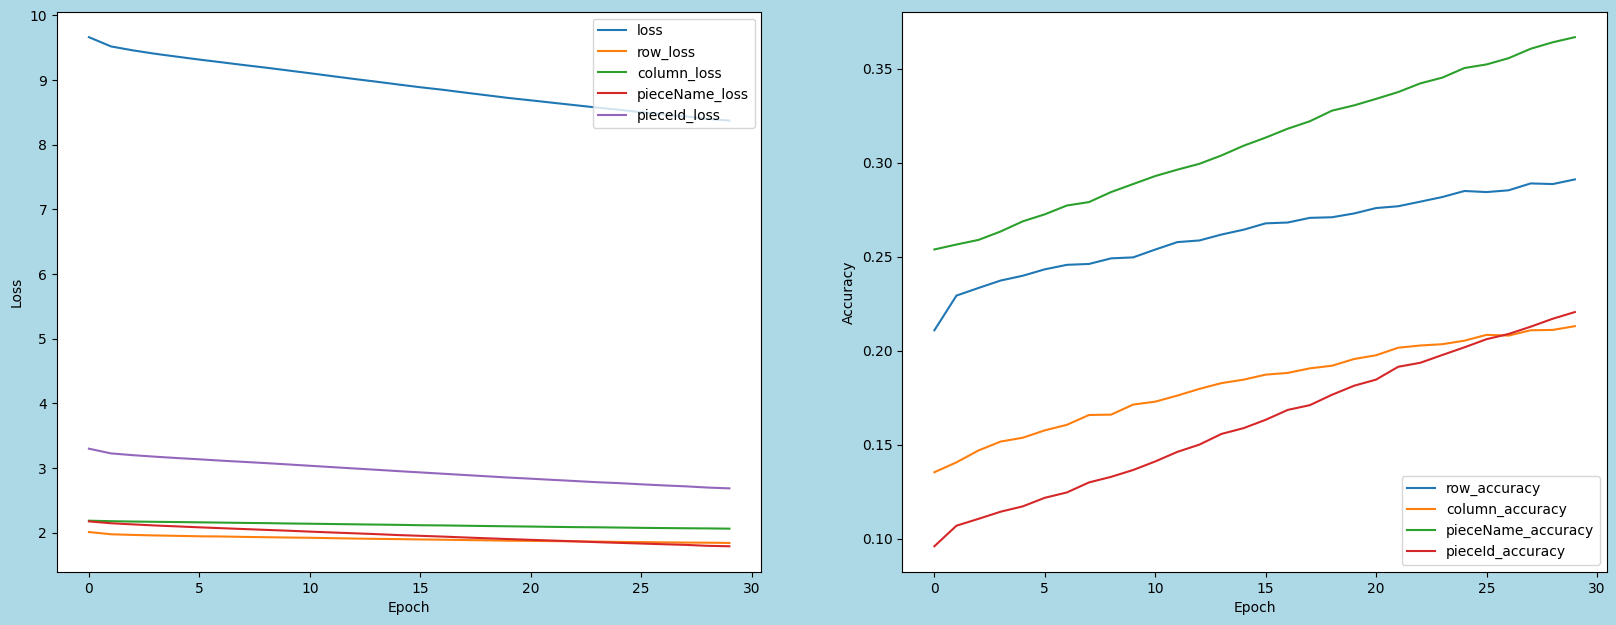

In [160]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (20, 16), facecolor= 'lightblue')
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)

ax1.plot(history.history['loss'], label='loss')
ax1.plot(history.history['row_loss'], label='row_loss')
ax1.plot(history.history['column_loss'], label='column_loss')
ax1.plot(history.history['pieceName_loss'], label='pieceName_loss')
ax1.plot(history.history['pieceId_loss'], label='pieceId_loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper right')

ax2.plot(history.history['row_accuracy'], label='row_accuracy')
ax2.plot(history.history['column_accuracy'], label='column_accuracy')
ax2.plot(history.history['pieceName_accuracy'], label='pieceName_accuracy')
ax2.plot(history.history['pieceId_accuracy'], label='pieceId_accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='lower right')

In [161]:
predictions = model.predict(ts_input)

3125/3125 [==============================] - 27s 8ms/step


In [148]:
ts_output_row.loc[0].to_numpy().astype(float)

array([0., 0., 0., 0., 0., 1., 0., 0., 0.])

<BarContainer object of 40 artists>

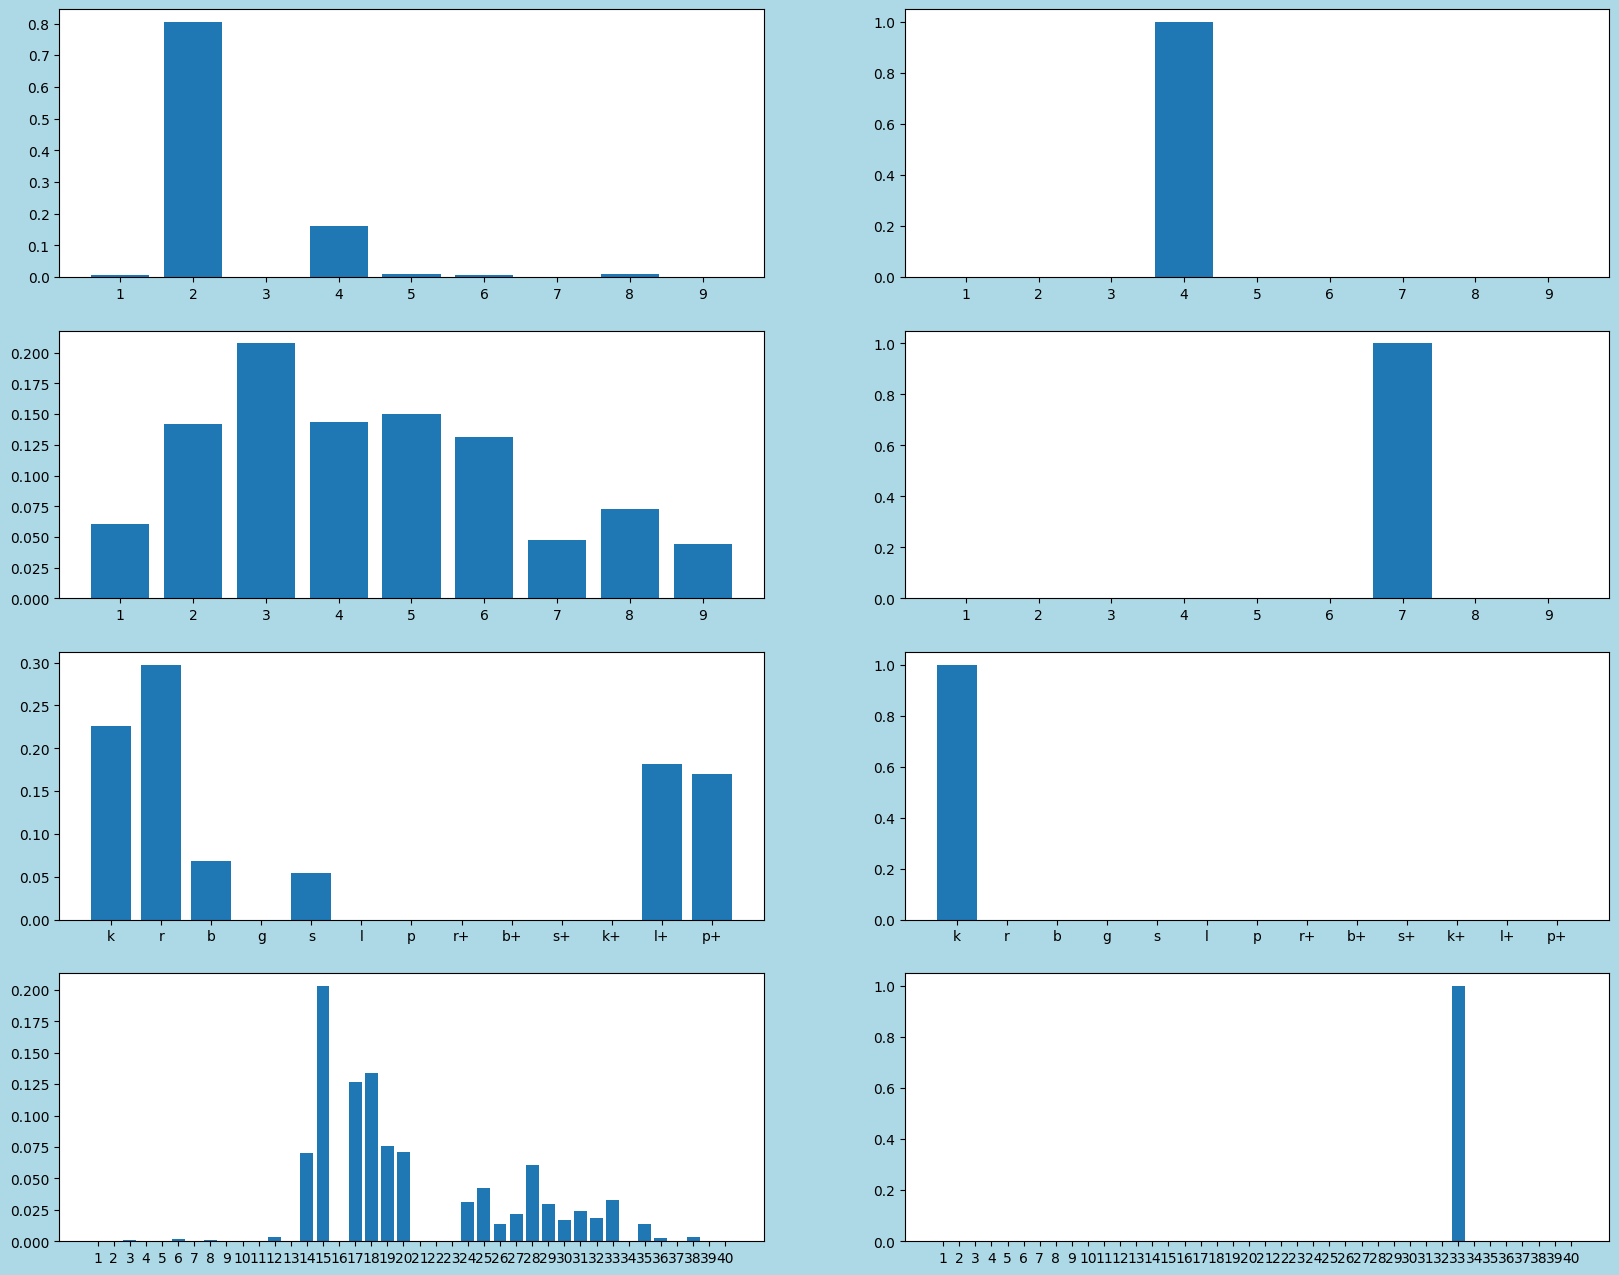

In [162]:
index = 100

row_label = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
column_label = ['1', '2', '3', '4', '5', '6', '7', '8', '9']
pieceName_label = ['k', 'r', 'b', 'g', 's', 'k', 'l', 'p', 'r+', 'b+', 's+', 'k+', 'l+', 'p+']
pieceId_label = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40']

fig = plt.figure(figsize = (20, 16), facecolor= 'lightblue')
ax1 = fig.add_subplot(4, 2, 1)
ax2 = fig.add_subplot(4, 2, 2)
ax3 = fig.add_subplot(4, 2, 3)
ax4 = fig.add_subplot(4, 2, 4)
ax5 = fig.add_subplot(4, 2, 5)
ax6 = fig.add_subplot(4, 2, 6)
ax7 = fig.add_subplot(4, 2, 7)
ax8 = fig.add_subplot(4, 2, 8)

ax1.bar(row_label, predictions[0][index])
ax2.bar(row_label, ts_output_row.loc[index].to_numpy().astype(float))
ax3.bar(column_label, predictions[1][index])
ax4.bar(column_label, ts_output_column.loc[index].to_numpy().astype(float))
ax5.bar(pieceName_label, predictions[2][index])
ax6.bar(pieceName_label, ts_output_pieceName.loc[index].to_numpy().astype(float))
ax7.bar(pieceId_label, predictions[3][index])
ax8.bar(pieceId_label, ts_output_pieceId.loc[index].to_numpy().astype(float))
